# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


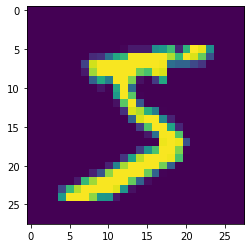

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Convolution2D(64, 3, 3, activation='relu'))

model.add(MaxPooling2D(2))


model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Convolution2D(32, 3, 3, activation='relu'))

model.add(Convolution2D(10, 1, activation='relu'))

model.add(Convolution2D(10, 4))

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Kera

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 6, 32)         

In [12]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [13]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=15, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.





Epoch 1/15





60000/60000 [==============================] - 34s 562us/step - loss: 0.2056 - acc: 0.9359
Epoch 2/15
60000/60000 [==============================] - 27s 447us/step - loss: 0.0660 - acc: 0.9804
Epoch 3/15
60000/60000 [==============================] - 27s 448us/step - loss: 0.0487 - acc: 0.9854
Epoch 4/15
60000/60000 [==============================] - 27s 455us/step - loss: 0.0391 - acc: 0.9884
Epoch 5/15
60000/60000 [==============================] - 28s 463us/step - loss: 0.0310 - acc: 0.9899
Epoch 6/15
60000/60000 [==============================] - 28s 463us/step - loss: 0.0281 - acc: 0.9906
Epoch 7/15
60000/60000 [==============================] - 28s 462us/step - loss: 0.0243 - acc: 0.9926
Epoch 8/15
60000/60000 [==============================] - 28s 464us/step - loss: 0.0218 - acc: 0.9932
Epoch 9/15
60000/60000 [==============================] - 28s 469us/step - loss: 0.0190 - acc: 0.9940
Epoch 10/15
60000/60000 [==============================] - 28s 464us/step 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [15]:
print(score)

[0.026954950989454846, 0.9928]


In [0]:
y_pred = model.predict(X_test)

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[1.7925775e-26 9.5239425e-19 1.4813918e-12 2.8745012e-12 1.0571925e-18
  2.7161660e-16 8.3304352e-36 1.0000000e+00 1.8746621e-13 4.1198951e-17]
 [1.7607306e-07 3.1817197e-07 9.9999952e-01 1.3678089e-13 1.4660306e-11
  6.6338390e-17 1.1825907e-10 2.9284897e-12 3.3605143e-09 2.8483777e-13]
 [8.7193017e-09 9.9999928e-01 7.2134015e-10 9.3156288e-13 5.6766538e-07
  3.5611240e-11 8.8636462e-08 2.7285800e-08 7.3622597e-09 5.8255789e-10]
 [9.9999952e-01 2.4334779e-12 3.3770450e-10 5.3633703e-13 1.2799788e-10
  1.7556800e-11 4.6428906e-07 1.1115940e-10 1.2620306e-09 4.5708610e-09]
 [1.4637449e-19 3.5811193e-17 3.4651986e-17 5.8479009e-22 9.9999976e-01
  2.5407287e-19 3.8270308e-17 1.3747583e-17 2.6644602e-07 1.0961974e-13]
 [1.3144921e-09 9.9999642e-01 2.3826316e-09 5.4176401e-13 3.4364107e-06
  1.1273714e-11 2.0584130e-08 7.1957025e-08 2.0663588e-08 2.7210398e-09]
 [1.4635954e-23 6.7486502e-11 7.8081699e-15 7.8386808e-20 9.9999869e-01
  2.8442030e-15 5.1072397e-16 3.2667440e-13 1.3446405e-06 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [19]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored